# Algoritmo de Prediccion de Calidad del Aire(pm2.5)

# Algoritmo Empleado (Serie de tiempo)
Una serie temporal o cronológica es una secuencia de datos, observaciones o valores, medidos en determinados momentos y ordenados cronológicamente. Los datos pueden estar espaciados a intervalos iguales (como la temperatura en un observatorio meteorológico en días sucesivos al mediodía) o desiguales (como el peso de una persona en sucesivas mediciones en el consultorio médico, la farmacia, etc.)

### Autores
   * Rina E. López
   * Elvis M. Martinez

## Análisis del Problema

La calidad del aire en El Salvador es un tema de interes nacional, ya que actualmente no se cuenta con mecanismos que permitan su facil conocimiento y analisis de los datos, por lo que este algoritmo deberá permitir analizar la fuente de datos provenientes de estaciones de monitoreo de calidad del aire.


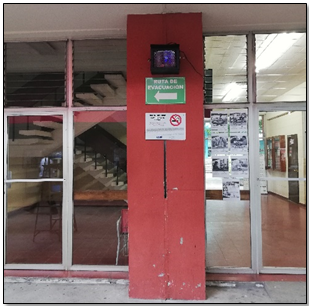




## Entendimiento de los Datos

Con el fin de analizar y tratar de predecir la calidad del aire en Santa Tecla, se analizaran los datos provenientes de una estacion de monitoreo, la cual mide material particulado 2.5 y 10, asi como temperatura, ademas se describen las variables utilizadas:


- Fecha_Hora  : tipo fecha y hora, con mediciones programadas cada 20 min.
- PM25 : numerica decimal, 8.0,8.8,9.0,etc
- PM10 : numerica decimal, 8.0,8.8,9.0,etc
- Temp: numerica decimal, 8.0,8.8,9.0,etc
- Mes  : numerica entera del 1 al 12

## Exploración de los Datos

'data.frame':	3544 obs. of  27 variables:
 $ X.   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Fecha: chr  "20/06/2019" "20/06/2019" "20/06/2019" "20/06/2019" ...
 $ PM25 : int  8 8 8 7 7 7 6 9 9 11 ...
 $ PM10 : int  8 8 8 7 7 7 6 9 10 12 ...
 $ TEMP : num  26.9 26.7 26.8 31.7 31.8 29.6 32.3 29.6 29.6 25 ...
 $ dia  : int  20 20 20 20 20 20 20 21 21 21 ...
 $ Mes  : int  6 6 6 6 6 6 6 6 6 6 ...
 $ Prom : num  7.21 NA NA NA NA ...
 $ X    : logi  NA NA NA NA NA NA ...
 $ X.1  : logi  NA NA NA NA NA NA ...
 $ X.2  : logi  NA NA NA NA NA NA ...
 $ X.3  : logi  NA NA NA NA NA NA ...
 $ X.4  : logi  NA NA NA NA NA NA ...
 $ X.5  : logi  NA NA NA NA NA NA ...
 $ X.6  : logi  NA NA NA NA NA NA ...
 $ X.7  : logi  NA NA NA NA NA NA ...
 $ X.8  : logi  NA NA NA NA NA NA ...
 $ X.9  : logi  NA NA NA NA NA NA ...
 $ X.10 : logi  NA NA NA NA NA NA ...
 $ X.11 : logi  NA NA NA NA NA NA ...
 $ X.12 : logi  NA NA NA NA NA NA ...
 $ X.13 : logi  NA NA NA NA NA NA ...
 $ X.14 : logi  NA NA NA NA NA NA ...
 $ X.

ERROR: Error in switch(units, `in` = res, cm = res/2.54, mm = res/25.4, px = 1) * : non-numeric argument to binary operator


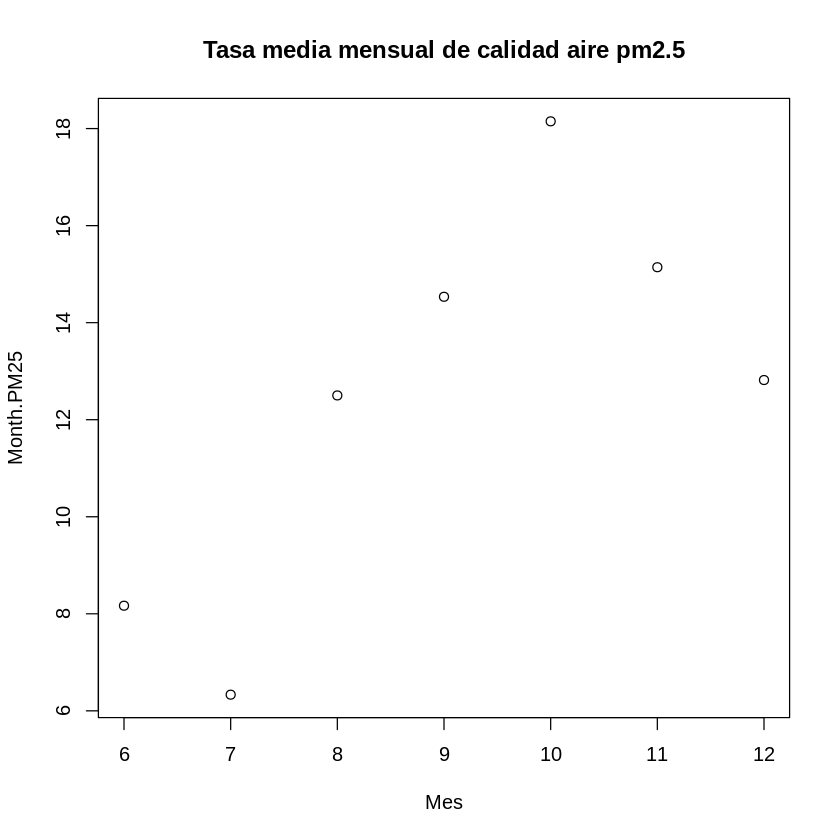

In [1]:
## Lee el archivo csv
unemp.data <- read.csv('registro_pmitca.csv', header = TRUE, stringsAsFactors = FALSE)
# Obtener información general sobre el conjunto de datos 
str(unemp.data)
# Indice de calidad del aire PM2.5
Month.PM25 <- sapply(split(unemp.data$PM25, unemp.data$Mes), mean)
Mes = c(6:12)
plot(Mes, Month.PM25,  main = "Tasa media mensual de calidad aire pm2.5")
pdf("prom.pdf")
plot(Mes, Month.PM25,  main = "Tasa media mensual de calidad aire pm2.5")
lines(Mes, Month.PM25)
dev.off()

### Preparación del conjunto de datos para su análisis.
Este conjunto de datos tiene casi 2500 observaciones recolectadas cada 20 min provenientes de la estacion de monitoreo de calidad del aire ubicada en la Sede Central de ITCA-FEPADE

In [ ]:
# Dividir en conjuntos de datos más pequeños clasificados por año
sub.6 <- subset(unemp.data, unemp.data[,7] == 6)
sub.7 <- subset(unemp.data, unemp.data[,7] == 7)
sub.8 <- subset(unemp.data, unemp.data[,7] == 8)
sub.9 <- subset(unemp.data, unemp.data[,7] == 9)
sub.10 <- subset(unemp.data, unemp.data[,7] == 10)
sub.11 <- subset(unemp.data, unemp.data[,7] == 11)
sub.12 <- subset(unemp.data, unemp.data[,7] == 12)

In [ ]:
#Preparar los datos para el análisis de series de tiempo
# Tasa de empleo mensual promedio ordenada por año para todos los EE. UU.
mean6 <- sapply(split(sub.6$PM25, factor(sub.6$Mes, ordered=TRUE)), mean) 
mean7 <- sapply(split(sub.7$PM25, factor(sub.7$Mes, ordered=TRUE)), mean) 
mean8 <- sapply(split(sub.8$PM25, factor(sub.8$Mes, ordered=TRUE)), mean) 
mean9 <- sapply(split(sub.9$PM25, factor(sub.9$Mes, ordered=TRUE)), mean) 
mean10 <- sapply(split(sub.10$PM25, factor(sub.10$Mes,ordered=TRUE)), mean) 
mean11 <- sapply(split(sub.11$PM25, factor(sub.11$Mes, ordered=TRUE)), mean) 
mean12 <- sapply(split(sub.12$PM25, factor(sub.12$Mes, ordered=TRUE)), mean) 

In [ ]:
#Crear un marco de datos de tasas medias mensuales por año
mean.monthly.PM25 = data.frame('Mes'=c(rep('Junio',30),rep('Julio',30),rep('Agosto',30),rep('Septiembre',30),rep('Octubre',30),rep('Noviembre',30),rep('Diciembre',30)),
                'PM25' = c(mean6,mean7,mean8,mean9,mean10,mean11,mean12))

In [ ]:
#Las primeras filas de este conjunto de datos
head(mean.monthly.PM25)
str(mean.monthly.PM25)



### Trabajando con series de tiempo en R

R contiene varias clases de series de tiempo. En este caso, trabajaremos con la clase `ts` básica. Una clase poderosa de `zoo` proporciona más capacidades. El paquete `xts` agrega extensibilidad a la clase` zoo`. Muchas otras clases de series de tiempo R están disponibles.

Los siguientes paquetes son necesarios para su posterior análisis:

In [ ]:
#Evitar mostrar warning messages
options(warn=-1)
# Cargar paquetes y funciones requeridos
require(repr)
require(forecast)

Ahora, vamos a crear un objeto de series de tiempo de clase de R ts simple para la medida de pm2.5 de calidad del aire

In [ ]:
#Convierte a series de tiempo usando la función ts
itca.pm25.ts <- ts(mean.monthly.PM25[,2], start = c(6,1), freq =36)

#Gráfico the time series
options(repr.pmales.extlot.width=8, repr.plot.height=4)
plot(itca.pm25.ts, main = 'Gráfico de series de tiempo del material particulado 2.5')

options(repr.pmales.extlot.width=8, repr.plot.height=4)
plot(log(itca.pm25.ts), main = 'Serie temporal de registro del material particulado 2.5')

Decimos que una serie de tiempo con una variación constante es **estacionaria**. Las propiedades de una serie temporal estacionaria no varían con el tiempo.

Existe un patrón **estacional** cuando una serie está influenciada por factores estacionales (por ejemplo, el trimestre del año, el mes o el día de la semana). La estacionalidad es siempre *de un período fijo y conocido*. Por lo tanto, las series temporales estacionales a veces se denominan **periódicas** series temporales.

Existe un patrón **cíclico** cuando los datos muestran subidas y caídas que *no son de período fijo*. Por ejemplo, los ciclos económicos que suelen durar varios años, pero de antemano se desconoce la duración del ciclo actual.

Existe una **tendencia** cuando hay un aumento o disminución a largo plazo en los datos. No tiene que ser lineal. A veces nos referiremos a una tendencia que "cambia de dirección" cuando podría ir de una tendencia creciente a una tendencia decreciente.

En el gráfico anterior, notamos las siguientes propiedades de esta serie de tiempo.

- Esta serie temporal tiene una tendencia significativa.
- Tiene un componente estacional.
- La duración del ciclo (en meses) varía con el tiempo.
- El gráfico de la serie logarítmica transformada parece tener un tamaño ligeramente más uniforme para el componente estacional que el no transformado. Así que vamos a utilizar la serie de log transformado para un análisis más detallado

Cualquier serie temporal con una tendencia implica que varía con el tiempo, lo que significa que no es estacionario**.

Una serie temporal estacionaria sin patrón estacional o cíclico y sin tendencia perceptible se dice que es **independiente distribuida de manera idéntica** o **i.i.d.** An i.i.d. Las series de tiempo tienen una distribución normal con una distribución en forma de campana y una gráfica Q-Q de línea recta. Tal serie de tiempo también se llama ruido blanco.

Vamos a trazar la distribución de nuestras series de tiempo a continuación:

In [ ]:
# Gráfico la distribución - histograma y QQ de la serie temporal
dist.ts = function(df, col = 'residual', bins = 40)
{
  par(mfrow = c(1,2))
  temp = as.vector(df)
  breaks = seq(min(temp), max(temp), length.out = (bins + 1))
  hist(temp, breaks = breaks, main = paste('Distribution of', col), xlab = col)
  qqnorm(temp, main = paste('Q-Q Normal plot of', col))
  par(mfrow = c(1,1))
}

options(repr.pmales.extlot.width=8, repr.plot.height=4)
dist.ts(log(itca.pm25.ts), col = 'PM2.5 Itca')

La gráfica Q-Q no es una línea recta y, por lo tanto, esto no es un i.i.d. distribución normal. Esto confirma nuestros hallazgos iniciales de que este conjunto de datos tiene ciertos patrones y tendencias inherentes.

A continuación exploremos algunas formas de detectar patrones.

**Autocorrelación**, también conocida como correlación en serie, es la correlación de una serie de tiempo con una copia retrasada de sí misma. Informalmente, es la similitud entre las observaciones en función del tiempo de retraso entre ellas. El análisis de la autocorrelación es una herramienta matemática para encontrar patrones repetitivos, como la presencia de periodicidad o estacionalidad.

En estadística, la autocorrelación de un proceso aleatorio es la correlación de Pearson entre los valores del proceso en diferentes momentos, en función de los dos tiempos o del retraso. Esto se denomina función de correlación automática o ACF. El ACF es una de las herramientas utilizadas para encontrar patrones en los datos. Específicamente, el ACF le indica la correlación entre puntos separados por varios retrasos de tiempo. Tenga en cuenta que para cualquier serie, la autocorrleación en el retardo cero es igual a uno.

También podemos definir una segunda orden **autocorrelación parcial**. La función de autocorrelación parcial (PACF) proporciona la correlación parcial de una serie de tiempo con sus propios valores rezagados, controlando los valores de la serie de tiempo en todos los rezagos más cortos. Contrasta con la función de autocorrelación, que no controla para otros retrasos. Esta función desempeña un papel importante en los análisis de datos dirigidos a identificar la extensión del retraso en un modelo autorregresivo (AR), que describiremos en breve.

Ahora, vamos a trazar el ACF y PACF de nuestros datos de tasa de desempleo

In [ ]:
#Funciones de autocorrelación y autocorrelación parcial
plot.acf <- function(df, col = 'remainder', is.df =TRUE)
{
  if(is.df) temp <- df[, col]
  else temp <- df
  par(mfrow = c(2,1))
  acf(temp, main = paste('ACF de', col))
  pacf(temp, main = paste('PACF de', col))
  par(mfrow = c(1,1))
}
      
options(repr.pmales.extlot.width=8, repr.plot.height=6)
plot.acf(log(itca.pm25.ts), col = 'Tasa de Material Particulado 2.5', is.df = F)

Las líneas de puntos azules en los gráficos ACF y PACF son los intervalos de confianza del 95% para los valores de correlación. Las líneas verticales muestran la correlación. Cualquier línea vertical que cruce las líneas punteadas azules indica un valor de correlación significativo. Un i.i.d. las series de tiempo normalmente distribuidas no tendrán valores significativos de ACF o PACF más allá del retraso 0. En este caso, el gráfico de ACF tiene varios retrasos significativos no cero y muestra cierto patrón de aumento y caída. También el ACF está disminuyendo o decayendo lentamente. La gráfica PACF muestra valores significativos para más de un retraso, lo que indica que podría haber una tendencia. Esto claramente no es una serie temporal estacionaria.

El proceso de extracción de la tendencia, el ciclo y los componentes estacionales se denomina descomposición. A continuación, veremos los métodos de descomposición.

**Descomposición basada en tasas de cambio**

Esta es una técnica importante para todos los tipos de análisis de series de tiempo, especialmente para el ajuste estacional. Busca construir, a partir de una serie temporal observada, una serie de componentes (que podrían usarse para reconstruir el original mediante adiciones o multiplicaciones) donde cada una de ellas tiene una cierta característica o tipo de comportamiento. Por ejemplo, las series de tiempo generalmente se descomponen en:

$ T_t $, el componente de tendencia en el tiempo t, que refleja la progresión a largo plazo de la serie.

$ C_t $, el componente cíclico en el momento t, que describe fluctuaciones repetidas pero no periódicas.

$ S_t $, el componente estacional en el tiempo t, que refleja la estacionalidad.

$ I_t $, el componente irregular (o "ruido") en el tiempo t, que describe influencias aleatorias e irregulares. Esta es la parte de la serie que no se puede atribuir a los componentes estacionales, de ciclo o de tendencia y se conoce como residual, resto o error. Por lo tanto, una serie temporal que utiliza un modelo aditivo se puede considerar como:

$ y_t $ = $ T_t $ + $ C_t $ + $ S_t $ + $ I_t $

mientras que, un modelo multiplicativo sería:

$ y_t $ = $ T_t $ x $ C_t $ x $ S_t $ x $ I_t $

Se usaría un modelo aditivo cuando las variaciones en torno a la tendencia no varíen con el nivel de las series temporales, mientras que como modelo multiplicativo sería apropiado si la tendencia es proporcional al nivel de las series temporales.

### Descomposición de STL

A veces, la tendencia y los componentes cíclicos se agrupan en uno, llamado componente de tendencia-ciclo. El componente de ciclo de tendencia se puede denominar simplemente componente de "tendencia", aunque puede contener un comportamiento cíclico. Por ejemplo, una descomposición estacional de series de tiempo, conocida como **S** easonal & **T** rend **descomposición** utilizando **L** oess o **STL**, descompone una serie de tiempo en componentes estacionales, de tendencia e irregulares utilizando loess y grafican los componentes por separado, por lo que el componente cíclico (si está presente en los datos) se incluye en el gráfico del componente de "tendencia".

Como su nombre indica, este modelo hace lo siguiente:

- La tendencia se elimina utilizando un modelo de regresión LOESS.
- El componente estacional se elimina mediante una regresión en componentes periódicos.
- El resto se conoce como el residual.

A continuación, aplicaremos el modelo de descomposición STL a nuestras series de tiempo transformadas de registro y veremos si esto elimina efectivamente la tendencia y la estacionalidad.

In [ ]:
# Función para la descomposición STL de una serie de tiempo en componentes
ts.decomp <- function(df, col = 'Series Name', span = 0.13, Mult = TRUE)
{
  if(Mult) temp = log(df)  else temp = df
  spans = span * length(temp)  
  fit <- stl(temp, s.window = "periodic", t.window = spans)
  plot(fit, main = paste('Decompositon of',col,'with loess span = ', as.character(span)))
  fit$time.series
}

itca.pm25.decomp <- ts.decomp((itca.pm25.ts), col = 'Pm2.5 ITCA-FEPADE', Mult = FALSE)
str(itca.pm25.decomp)

#Plot the ACF & PACF of the remainder
options(repr.pmales.extlot.width=8, repr.plot.height=6)
plot.acf(itca.pm25.decomp[, 1], is.df = FALSE)

Si el proceso STL ha eliminado la tendencia y los patrones con éxito, la distribución del resto o residual debe ser i.i.d. con ACF y PACF que no muestran retrasos significativos distintos de cero. De los trazados de ACF y PACF del residuo, todavía vemos algunos valores significativos de retardo no cero. Así que el proceso STL no ha eliminado la tendencia o los patrones completamente.

## Modelos ARIMA para la serie residual.

Ahora que hemos investigado las propiedades básicas de las series de tiempo y el método de descomposición de STL, investiguemos los modelos para tratar los residuos. Trabajaremos con lo que se conoce y los modelos **modelo autorregresivo integrado de promedio móvil** o **ARIMA**. En su núcleo, estos modelos son solo casos especiales de regresión lineal.

### Modelo Autoregresivo

Los valores de una serie de tiempo **autoregrisiva** o **AR** se determinan mediante una combinación lineal de los valores pasados. En otras palabras, el modelo AR representa la correlación serial en los valores de la serie de tiempo. Podemos escribir el valor de una serie autorregresiva o **ordenar p** o **AR (p)** series en el momento t como:

$$ x_t = \ alpha_1 x_ {t-1} + \ alpha_2 x_ {t-2} \ dots \ alpha_p x_ {t-p} + w_t $$

Un proceso AR tiene las siguientes propiedades:

- $ \ rho_0 = 1 $ siempre.
- $ p_k = \ alpha ^ k $
- Número de valores de PACF distintos de cero = p.

Los modelos AR son específicamente para **series temporales estacionarias**. Si la varianza no es constante o el componente de tendencia no se ha eliminado, los modelos AR no producirán resultados estadísticos.

### Modelo de media móvil

Para un modelo **de media móvil** o **MA**, el valor de la serie de tiempo en el tiempo `t` está determinado por una combinación lineal de términos de ruido blanco pasados. En otras palabras, el modelo de MA explica la correlación de series en términos de ruido. Podemos escribir el modelo MA (q) como la combinación lineal de los últimos términos de ruido blanco `q` $ w_i $:

$$ x_t = w_t + \ beta_1 w_ {t-1} + \ beta_2 w_ {t-2} + \ cdots + \ beta_q w_ {t-q} $$

Un proceso de MA tiene las siguientes propiedades:

- $ \ rho_0 = 1 $ siempre. (Auto correlación en el retraso 0)
- Número de $ \ rho_k distinto de cero; k \ ne 0 $ valores = q. (auto correlación en el retraso k)

Los modelos MA son específicamente para **series de tiempo estacionarias**. Si la varianza no es constante o el componente de tendencia no se ha eliminado, los modelos MA no producirán resultados estadísticos.

### El modelo de media móvil autoregresivo

Podemos combinar los modelos AR y MA para crear un **modelo de media móvil autorregresiva** o **ARMA**. Este modelo explica la correlación serial tanto en términos de ruido como en valores. Podemos escribir un modelo ARMA de orden `(p, q)` como:

$$ x_t = \ alpha_1 x_ {t-1} + \ alpha_2 x_ {t-2} \ dots \ alpha_p x_ {t-p}
w_t + \ beta_1 w_ {t-1} + \ beta_2 w_ {t-2} + \ cdots + \ beta_q w_ {t-q} $$

### Modelo de media móvil integrada autoregresiva

El modelo **de media móvil integrada autorregresiva**, o **ARIMA** agrega un término integrador al modelo ARMA. El componente de integración realiza la diferenciación para modelar un componente de paseo aleatorio. El componente integrante modela una de las **partes no estacionarias** de una serie de tiempo. El modelo ARIMA está definido por órdenes p, d, q. El orden del operador de diferenciación del término integrador está definido por `d`.

Ahora, intentemos estimar los parámetros ARIMA (p, d, q) de la serie de tiempo (recuerde, esta es una serie de tiempo no estacionaria) e imprimimos un resumen del mejor modelo y trazamos el ACF y el PACF del residual.

**De los resultados anteriores notamos que:**

El modelo ARIMA (3,0,4) con los siguientes coeficientes tiene el menor AIC (Criterios de información de Akaike)

**Coeficientes:**

| - | ar1 | ar2 | ar3 | ma1 | ma2 | ma3 | ma4 |
| - | -------- | ------- | -------- | -------- | -------- | ---- ---- | -------- |
| - | -1.0076 | 0,2590 | 0.7093 | 1.8248 | 1.3592 | 0.5135 | 0.2456 |
| es decir. | 0.0557 | 0.0958 | 0.0563 | 0.0696 | 0,1589 | 0.1603 | 0.0702 |

sigma ^ 2 estimado como 0.0006552: probabilidad de registro = 725.9, aic = -1435.8

- Todos los coeficientes son significativos (el error estándar asociado con estos coeficientes es algunas veces más pequeño que el valor del coeficiente en sí)
- El $ \ sigma ^ 2 $ o la varianza de la serie residual es un orden de magnitud menor que la serie original.

Así que este es el mejor modelo de ajuste para los residuos. Grafiquemos el ACF y el PACF de esto y observemos si este modelo eliminó el componente estacional y de tendencia del residuo o resto.

In [ ]:
#ARIMA model estimation for STL remainder
ts.model = function(ts, col = 'remainder', order = c(1,1,0))
{
  mod = arima(ts, order = order, include.mean = FALSE)
  print(mod)
  mod
}

arima.estimate1 <- ts.model(itca.pm25.decomp[, 1], order = c(1,0,1))#ARIMA(1,0,1) model
arima.estimate2 <- ts.model(itca.pm25.decomp[, 1], order = c(0,1,1))#ARIMA(0,1,1) model
arima.estimate3 <- ts.model(itca.pm25.decomp[, 1], order = c(1,1,3))#ARIMA(1,1,3) model 
arima.estimate4 <- ts.model(itca.pm25.decomp[, 1], order = c(0,1,5))#ARIMA(0,1,5) model
arima.estimate5 <- ts.model(itca.pm25.decomp[, 1], order = c(2,1,3))#ARIMA(2,1,3) model
arima.estimate6 <- ts.model(itca.pm25.decomp[, 1], order = c(3,0,4))#ARIMA(3,0,4) model
arima.estimate7 <- ts.model(itca.pm25.decomp[, 1], order = c(4,0,5))#ARIMA(4,0,5) model
arima.estimate8 <- ts.model(itca.pm25.decomp[, 1], order = c(4,1,5))#ARIMA(4,1,5) model

cat(paste('Sigma^2 of the original series = ', as.character(var(log(itca.pm25.ts)))))

# plot.acf(arima.estimate6$resid[-1], col = 'ARIMA(3,0,4) estimate', is.df = F)

- Desde el gráfico ACF, notamos retrasos significativos que no son cero, lo que indica que el componente AR no se eliminó completamente
- El gráfico PACF tiene valores significativos que indican que el componente MA no se eliminó completamente
- Ambos gráficos tienen valores significativamente menos significativos en comparación con los del resto de descomposición de STL, lo que indica que puede ser una buena estimación para el resto de STL

### Evaluación

El paquete R `forecast` en particular, tiene herramientas para estimar automáticamente los modelos ** ARIMA ** estacionales y utilizar estos modelos para hacer pronósticos futuros.

La función `auto.arima` del paquete` forecast` hace lo siguiente:

- Realiza una regresión progresiva progresiva a partir del orden máximo de cada coeficiente para encontrar el modelo ARIMA estacional óptimo. La opimización se realiza utilizando los Criterios de Información de Akaike (AIC) y los Criterios de Información Bayesiana (BIC).
- El modelo ARIMA estacional puede escribirse como ARIMA (p, d, q) (P, D, Q). Ya hemos explorado el modelo estándar de ARIMA, ARIMA (p, d, q). Los términos estacionales adicionales modelan el comportamiento estacional y de tendencia:
  - P es el orden del modelo autorregresivo estacional.
  - D es el orden de un operador diferenciador o integrador, que modela la tendencia.
  - Q es el orden del modelo de media móvil estacional.
  
Los ** Criterios de Información Bayesiana ** o ** BIC ** están estrechamente relacionados con los Criterios de Información de Akaike. El BIC pesa el número de parámetros en el modelo por el registro del número de observaciones.

Esta es la parte interesante. Utilizaremos `auto.arima` para ajustar un modelo lineal a nuestra serie de tiempo mensual de calidad del aire para ITCA-FEPADE Sede Central. Ya tenemos las tasas medidad reales u observadas disponibles de Junio a Noviembre de 2019 en https://docs.google.com/spreadsheets/d/1oNcv1dvcbH_ygVoerA3FJ_dZn11Tzgjp3Ielky_QkRM/edit#gid=0. Podemos comparar las tasas pronosticadas con las tasas reales para ver si nuestro modelo es adecuado o no.

In [ ]:
fit.itcapm25 <- auto.arima(itca.pm25.ts)
summary(fit.itcapm25)

De estos resultados notamos los siguientes puntos:

- El modelo estimado es ARIMA (1,1,4) (0,0,2).
- Sigma ^ 2 de la serie original = 0.046737234933687
- sigma ^ 2 del modelo estimado = 0.001906
- Los errores estándar de los coeficientes del modelo son generalmente un orden de magnitud menor que los valores de los coeficientes del modelo. Todos los coeficientes de este modelo parecen ser significativos
- Se producen una serie de métricas de error que incluyen:
  - Error medio, ME.
  - Error cuadrático medio, RMSE.
  - Error absoluto medio, MAE.
  - Error de predicción media, MPE, error de predicción absoluta media, MAPE y error de cuadratura absoluta media, o MASE. El error de predicción se calcula actualizando iterativamente el modelo en una ventana en expansión y midiendo el error de predecir el siguiente valor más allá de la ventana. Tenga en cuenta que el ** MAPE es bastante alto ** en comparación con los otros errores.
  - ACF1 es la correlación del modelo residual en el primer desfase distinto de cero, o retardo 1, que no es significativo en este caso.
  
Usaremos el modelo óptimo estimado para hacer predicciones en el futuro.

In [ ]:
unemp.forecast <- forecast((fit.itcapm25),h=12)
summary(unemp.forecast)
plot(unemp.forecast)

La línea azul en el gráfico anterior muestra las tasas pronosticadas y el frotis gris denota los intervalos de confianza.

Notamos que el 80% y el 95% de los intervalos de confianza son casi proporcionales al valor pronosticado en sí mismo y se hacen cada vez más amplios a medida que avanza el tiempo. Esto implica que la varianza puede estar aumentando con el tiempo, o la heterocedasticidad. Eso significa que esto puede no ser adecuado para nuestros datos de calidad del aire.

A continuación, comparemos los valores pronosticados con los valores reales (no ajustados por estacionalidad) obtenidos del sitio web en paralelo:

In [ ]:
forecast.vs.actual = data.frame('MES' = c(rep(11,1)), 'DIA' = c('lUN','MAR','MIE','JUE','VIE','SAB','DOM'),
                         'PRONOSTICADO'=c(round(exp(1.678036),2),round(exp(1.601984),2),round(exp(1.601984),2)
                                          ,round(exp(1.601984),2),round(exp(1.687569),2),round(exp(1.668689),2),
                                          round(exp(1.601984),2)),
                         'ACTUAL' = c(4.294380991,5.587612718,5.587612718,4.804946409,
                                      8.349825488,7.541664962,21.40552565))
head(forecast.vs.actual, 7)

In [ ]:
Esto muestra que a medida que avanzamos en el tiempo, los valores pronosticados van más y más lejos de la marca, lo que implica que esto no es un buen ajuste para nuestros datos.

### Resumen

Analizamos la tasa de desempleo nacional de los EE. UU. (U-3, no ajustada por estacionalidad), originalmente condensada del sitio web de BLS, como una serie de tiempo univariable de 1990 a 2016 y utilizamos los métodos ARIMA para predecir las tasas para 2017. Realizamos las siguientes observaciones:

- La serie de tiempo no es estacionaria.
- Tiene un componente estacional y una tendencia y un componente cíclico.
- Utilizamos la descomposición de STL para eliminar la tendencia y los componentes estacionales de la serie y encontramos que un modelo ARIMA (3,0,4) es un buen ajuste para el resto de la serie.
- Utilizamos la función `auto.arima` del paquete` forecast` para encontrar el modelo ARIMA más adecuado y lo usamos para pronosticar la tasa de desempleo en 2017.
- Realizamos una comparación visual del valor pronosticado y los valores reales obtenidos del [sitio web de BLS] (https://data.bls.gov/timeseries/LNU04000000) de enero a julio de 2017 y encontramos que los valores pronosticados se alejan aún más de los valores reales a medida que avanza el tiempo, lo que implica que este modelo no es un buen ajuste

### Conclusión

Nuestro objetivo fue estudiar las tasas de desempleo U-3 no ajustadas estacionalmente como una serie de tiempo univariada y encontrar modelos lineales que describieran las variaciones de manera efectiva. STL descompuso la serie de tiempo y ajustamos un modelo ARIMA (p, d, q) al resto. También ajustamos un modelo ARIMA (p, d, q) (P, D, Q) y lo usamos para pronosticar las tasas de desempleo para 2017. Después de comparar algunos de los valores reales con los valores pronosticados, llegamos a la conclusión de que este modelo no es bueno. ajuste.

En realidad, existen varios modelos que podríamos explorar e incluir otros factores o características para modelar nuestra tasa de desempleo y ayudarnos a hacer un mejor pronóstico, pero eso está fuera del alcance de este análisis.